## library 선언

In [157]:
import pandas as pd

In [158]:
import numpy as np

In [159]:
import matplotlib.pyplot as plt

## command view에서 chart loading

In [160]:
%matplotlib inline

## pop-up used chart loading and design

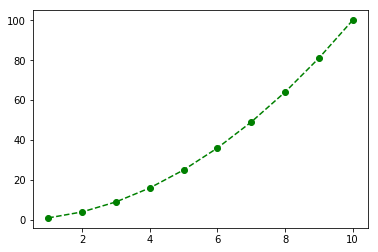

In [161]:
x=list(range(1,11,1))
y=[]
for i in x:
    y.append(i**2)
plt.plot(x,y,"go--")

(10, 40)

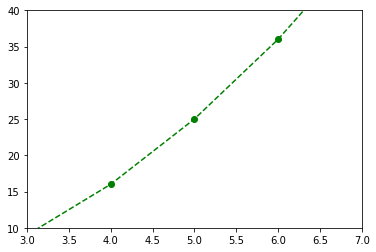

In [162]:
x=list(range(1,11,1))
y=[]
for i in x:
    y.append(i**2)
plt.plot(x,y,"go--")
plt.xlim(3,7)
plt.ylim(10,40)

Text(4, 4, 'point')

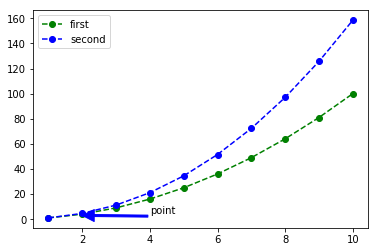

In [163]:
x=list(range(1,11,1))
y=[i**2 for i in x]
y2=[i**2.2 for i in x]
plt.plot(x,y,"go--",label="first")
plt.plot(x,y2,"bo--",label="second")
plt.legend(loc=0)
plt.annotate('point',xy=(2,3),
            xytext=(4,4),arrowprops=dict(color="blue",width=2))

## 시각화 level-up

Text(0.5, 1.0, 'Scatter plt')

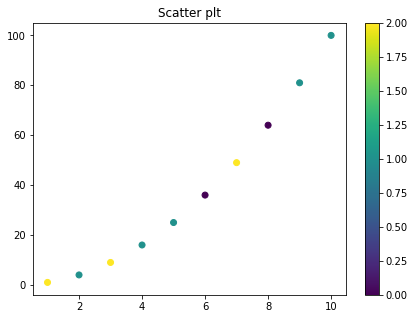

In [164]:
x=list(range(1,11,1))
y=[i**2 for i in x]
c=np.random.randint(0,3,len(y))
plt.figure(figsize=(7,5))
plt.scatter(x,y,marker='o',c=c)
plt.colorbar()
plt.title('Scatter plt')

## seaborn library 선언

In [165]:
import seaborn as sns

In [166]:
%matplotlib inline

## 특정 컬럼값의 갯수확인

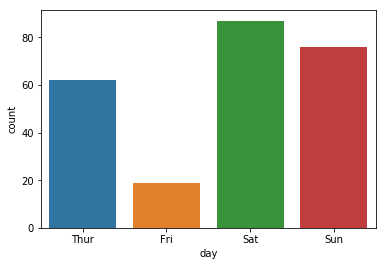

In [167]:
tips=sns.load_dataset('tips')
sns.countplot(x="day",data=tips)

In [168]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 특정 컬럼값의 분포도 확인

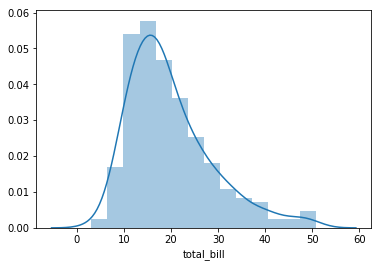

In [169]:
sns.distplot(tips['total_bill'])

In [170]:
tips['total_bill'].head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

## 3차원이상 시각화

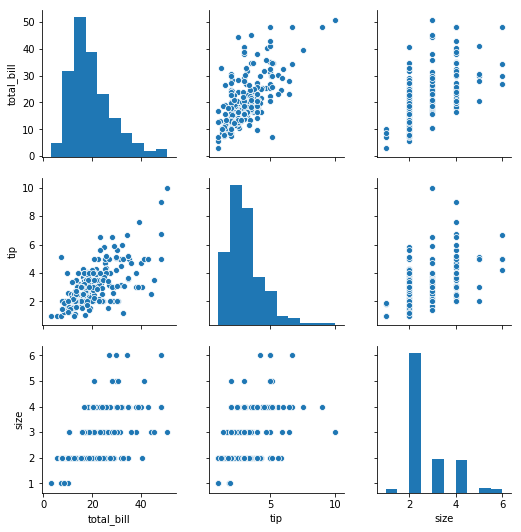

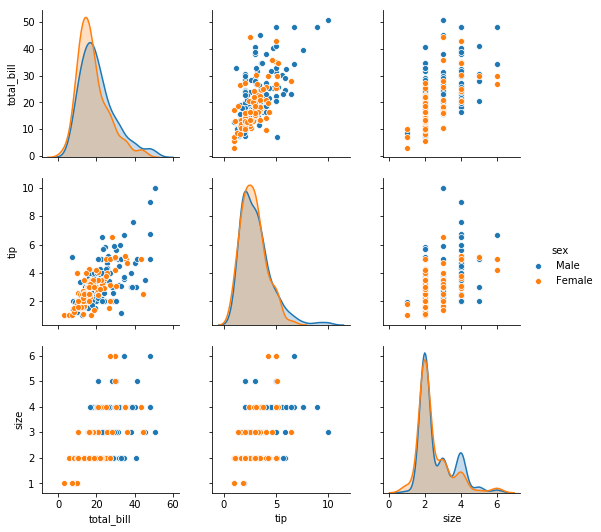

In [174]:
sns.pairplot(tips)
sns.pairplot(tips,hue='sex')

In [175]:
tips['sex'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): [Male, Female]

#### customerData.csv파일 활용하여 pairplot을 chartby

In [176]:
customerData.head()

,CUSTID,AVERAGEPRICE,EMI,DEVICECOUNT,PRODUCTAGE,CUSTTYPE
0,A13566,4273.900000,3,6.4,1.679181,Big-Screen-lover
1,A14219,3642.441950,2,4.0,2.682023,Sleeping-dog
2,A15312,3653.884565,2,5.0,3.208202,Sleeping-dog
3,A16605,3713.211107,2,6.6,0.900000,Early-bird
4,B10634,3391.074215,2,4.2,2.453656,Sleeping-dog


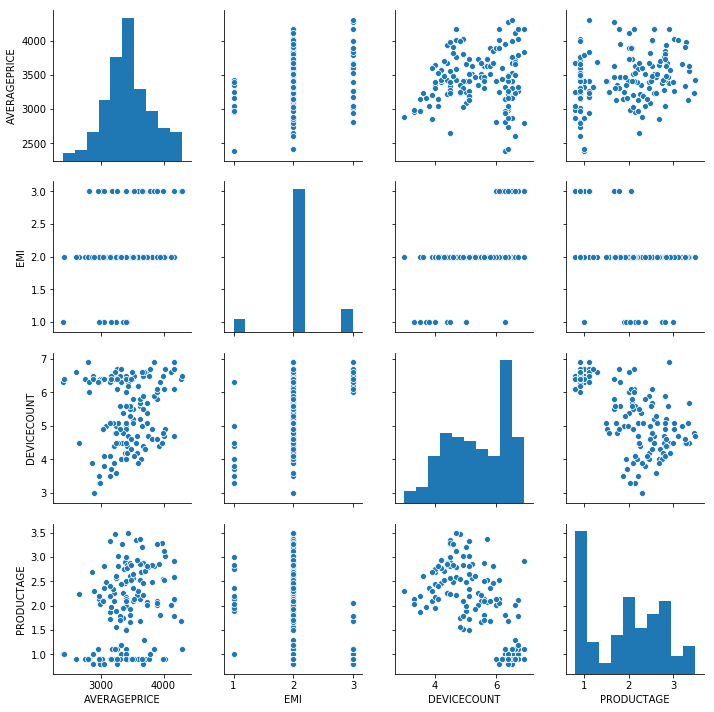

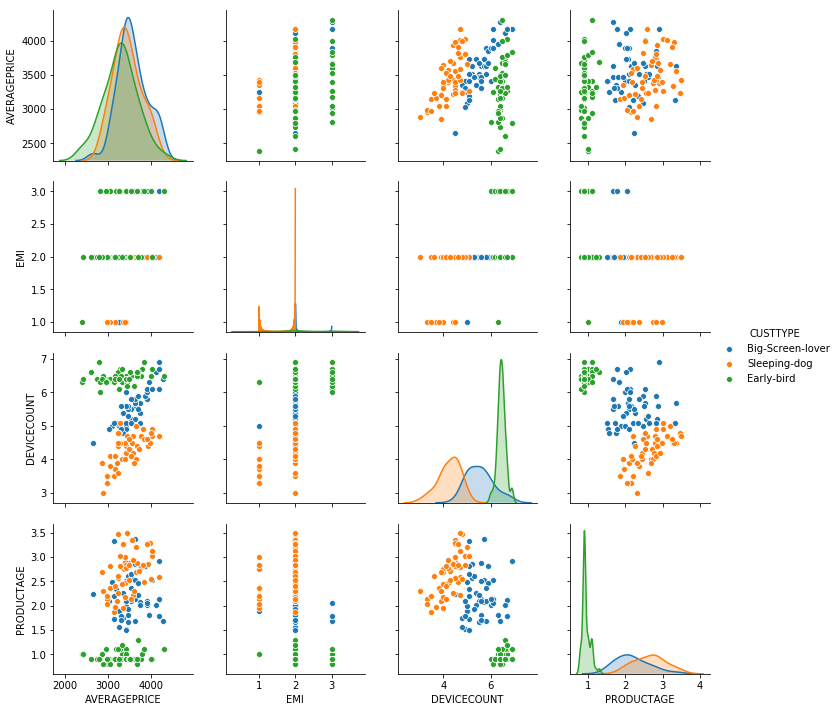

In [177]:
sns.pairplot(customerData)
sns.pairplot(customerData,hue='CUSTTYPE')

In [178]:
customerData['CUSTTYPE'].head()

0    Big-Screen-lover
1        Sleeping-dog
2        Sleeping-dog
3          Early-bird
4        Sleeping-dog
Name: CUSTTYPE, dtype: object

## 평균 및 실제범위(표준편차) 시각화

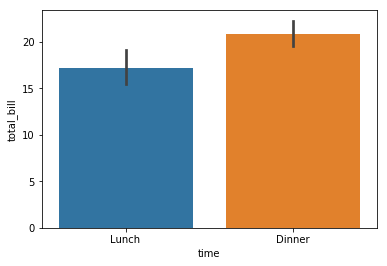

In [179]:
sns.barplot(x='time',y='total_bill',data=tips)

#### 정해진 카테고리기준에 어떤범위의 분포를 보여주는지 chartby

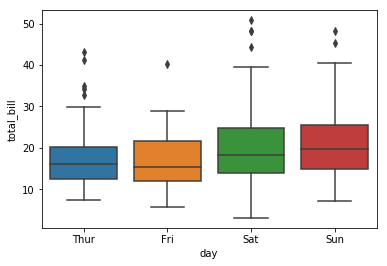

In [180]:
sns.boxplot(x='day',y='total_bill',data=tips)

##### 데이터 하단의 중앙값 1사분위수 (25%), 1사분위수-(IQR+1.5)
##### 데이터 상단의 중앙값 3사분위수 (75%), 3사분위수+(IQR+1.5)
##### IQR=3사분위수-1사분위수

## 상관관계

In [181]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


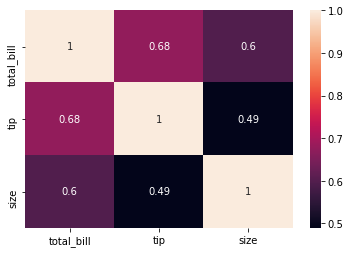

In [182]:
tc=tips.corr()
sns.heatmap(tc,annot=True)

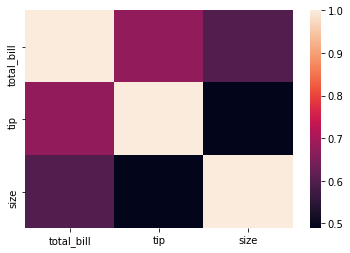

In [183]:
sns.heatmap(tc,annot=False)

## make pivot table; dataframe 형성후 chartby 

In [184]:
customerData.head()

,CUSTID,AVERAGEPRICE,EMI,DEVICECOUNT,PRODUCTAGE,CUSTTYPE
0,A13566,4273.900000,3,6.4,1.679181,Big-Screen-lover
1,A14219,3642.441950,2,4.0,2.682023,Sleeping-dog
2,A15312,3653.884565,2,5.0,3.208202,Sleeping-dog
3,A16605,3713.211107,2,6.6,0.900000,Early-bird
4,B10634,3391.074215,2,4.2,2.453656,Sleeping-dog


In [185]:
pivotData=customerData.pivot_table('AVERAGEPRICE',index='CUSTID',columns='CUSTTYPE',
                         aggfunc='mean')

In [186]:
pivotData.head()

CUSTTYPE,Big-Screen-lover,Early-bird,Sleeping-dog
CUSTID,,,
A13566,4273.9,NaN,NaN
A14219,NaN,NaN,3642.441950
A15312,NaN,NaN,3653.884565
A16605,NaN,3713.211107,NaN
B10634,NaN,NaN,3391.074215


In [187]:
pivotData.reset_index().head()

CUSTTYPE,CUSTID,Big-Screen-lover,Early-bird,Sleeping-dog
0,A13566,4273.9,NaN,NaN
1,A14219,NaN,NaN,3642.441950
2,A15312,NaN,NaN,3653.884565
3,A16605,NaN,3713.211107,NaN
4,B10634,NaN,NaN,3391.074215


In [188]:
pivotChart=pivotData.pivot_table(index='CUSTID',columns='CUSTID')

In [189]:
pivotChart.head()

CUSTTYPE Big-Screen-lover                                                   \
CUSTID             A13566 C10639 C12717 C18622 C19178 D15289 E10778 E11917   
CUSTID                                                                       
A13566             4273.9    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
A14219                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
A15312                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
A16605                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
B10634                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CUSTTYPE                ...   Sleeping-dog                                     \
CUSTID   E16221 E18145  ...         U16637 U16894 U17547 U17748 V10654 V16516   
CUSTID                  ...                                                     
A13566      NaN    NaN  ...            NaN    NaN    NaN    NaN    NaN    NaN   
A14219      NaN    NaN  ...            NaN    NaN    NaN    NaN    NaN    NaN   
A15312      NaN    NaN  ...            NaN    NaN    NaN    NaN    NaN    NaN   
A16605      NaN    NaN  ...            NaN    NaN    NaN    NaN    NaN    NaN   
B10634      NaN    NaN  ...            NaN    NaN    NaN    NaN    NaN    NaN   

CUSTTYPE                              
CUSTID   W10832 X14259 X19768 Y12458  
CUSTID                                
A13566      NaN    NaN    NaN    NaN  
A14219      NaN    NaN    NaN    NaN  
A15312      NaN    NaN    NaN    NaN  
A16605      NaN    NaN    NaN    NaN  
B10634      NaN    NaN    NaN    NaN  

[5 rows x 150 columns]

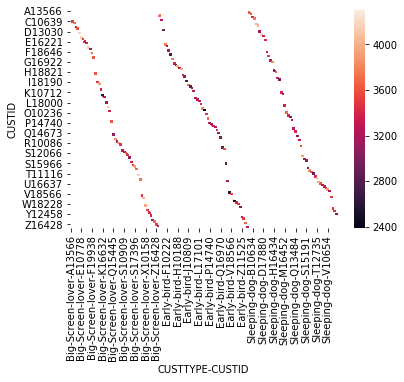

In [190]:
sns.heatmap(pivotChart)

## 연도가 증가함에 따라 승객수가 증가하고 있고, 여름에 또 집중된 표현을 chartby

In [191]:
flights=sns.load_dataset('flights')
fp=flights.pivot_table(index='month',columns='year',values='passengers')

In [192]:
fp.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


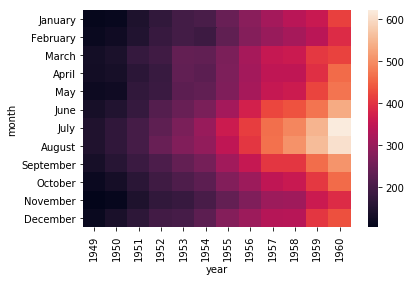

In [193]:
sns.heatmap(fp)

## 두 데이터의 상관관계를 linear형태로 chartby

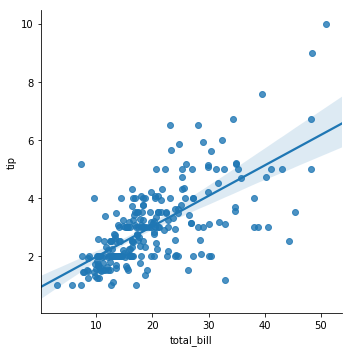

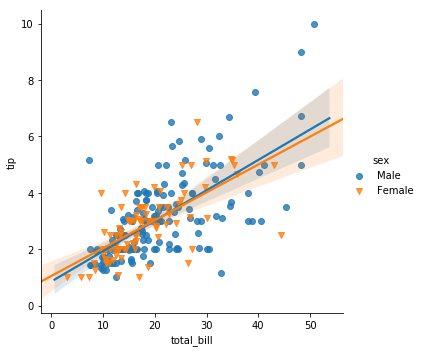

In [194]:
sns.lmplot(x='total_bill',y='tip',data=tips)
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'])

## lmplot을 활용하여 customerData를 분석

In [195]:
customerData.head()

,CUSTID,AVERAGEPRICE,EMI,DEVICECOUNT,PRODUCTAGE,CUSTTYPE
0,A13566,4273.900000,3,6.4,1.679181,Big-Screen-lover
1,A14219,3642.441950,2,4.0,2.682023,Sleeping-dog
2,A15312,3653.884565,2,5.0,3.208202,Sleeping-dog
3,A16605,3713.211107,2,6.6,0.900000,Early-bird
4,B10634,3391.074215,2,4.2,2.453656,Sleeping-dog


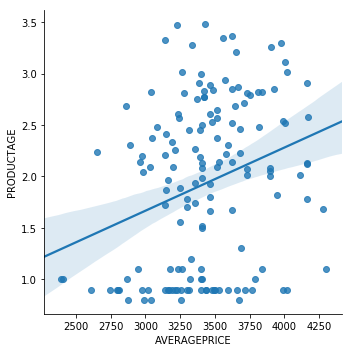

In [196]:
sns.lmplot(x='AVERAGEPRICE',y='PRODUCTAGE',data=customerData)

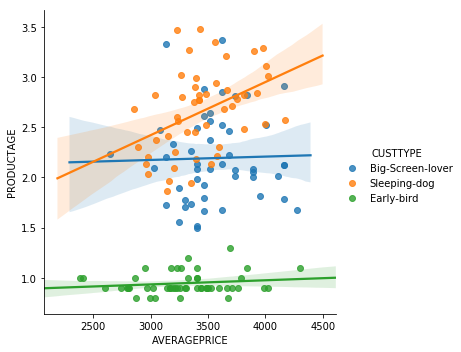

In [197]:
sns.lmplot(x='AVERAGEPRICE',y='PRODUCTAGE',data=customerData,hue='CUSTTYPE')